<a href="https://colab.research.google.com/github/Sivaram8/ybi1/blob/main/logistic_regression_from_scratch_iris_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species

In [ ]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("/kaggle/input/iris/Iris.csv")   #importing dataset and making dataframe
df.head()                                        #showing top 5 data entry

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe() #describes are data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info() #gives information about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.shape #tells us about no. of rows and column [rows , columns]

(150, 6)

In [ ]:
df.drop("Id",axis=1,inplace=True)    #droping  id becuase it is no use to us , Inplace = True means changes will take effect in original dataframe
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Visualization

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64


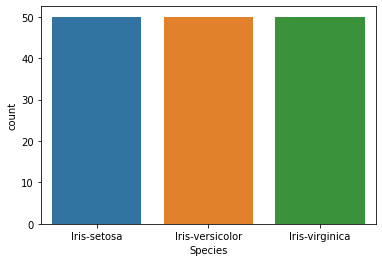

In [ ]:
print(df["Species"].value_counts())
sns.countplot(df["Species"])

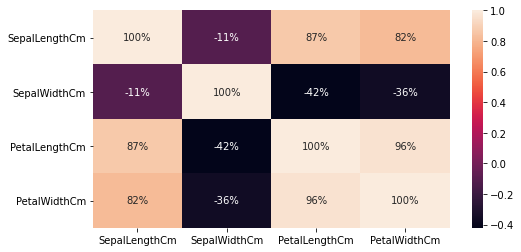

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True,fmt=".0%") #draws  heatmap with input as the correlation matrix calculted by(df.corr())
plt.show()


#### Observation--->

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.****

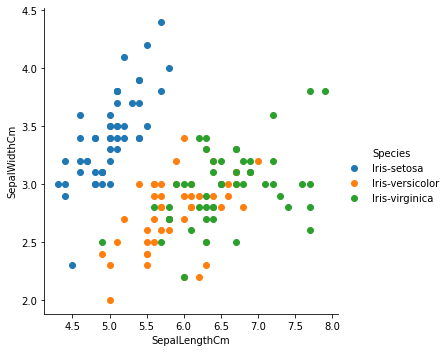

In [ ]:
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(df, hue="Species", height=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

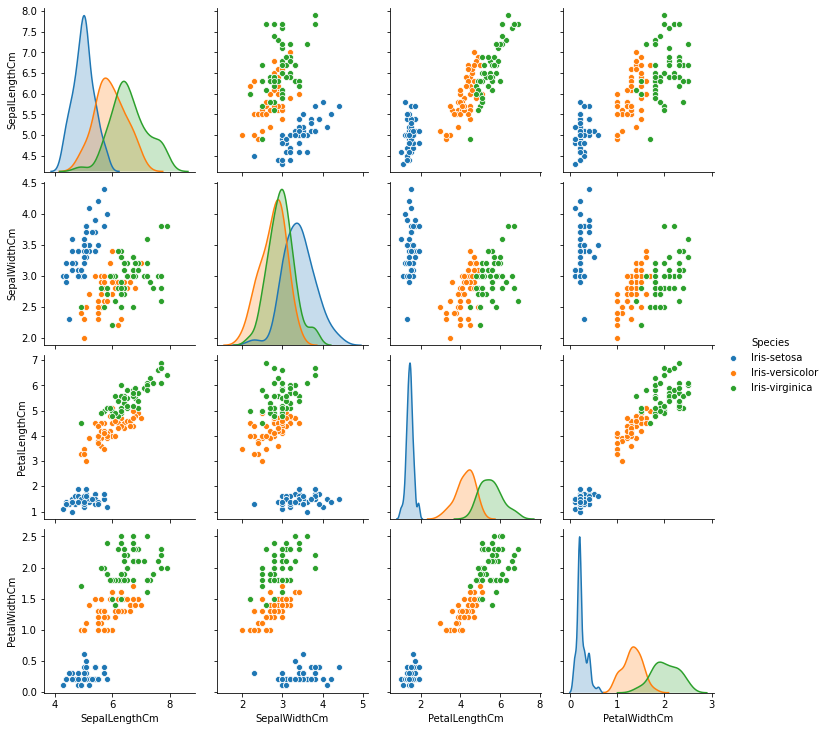

In [ ]:
#let Create a pair plot of some columns
sns.pairplot(df.iloc[:,:],hue='Species')  # graph also  tell us about the the realationship between the two columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ca673b3d0>,
      dtype=object)

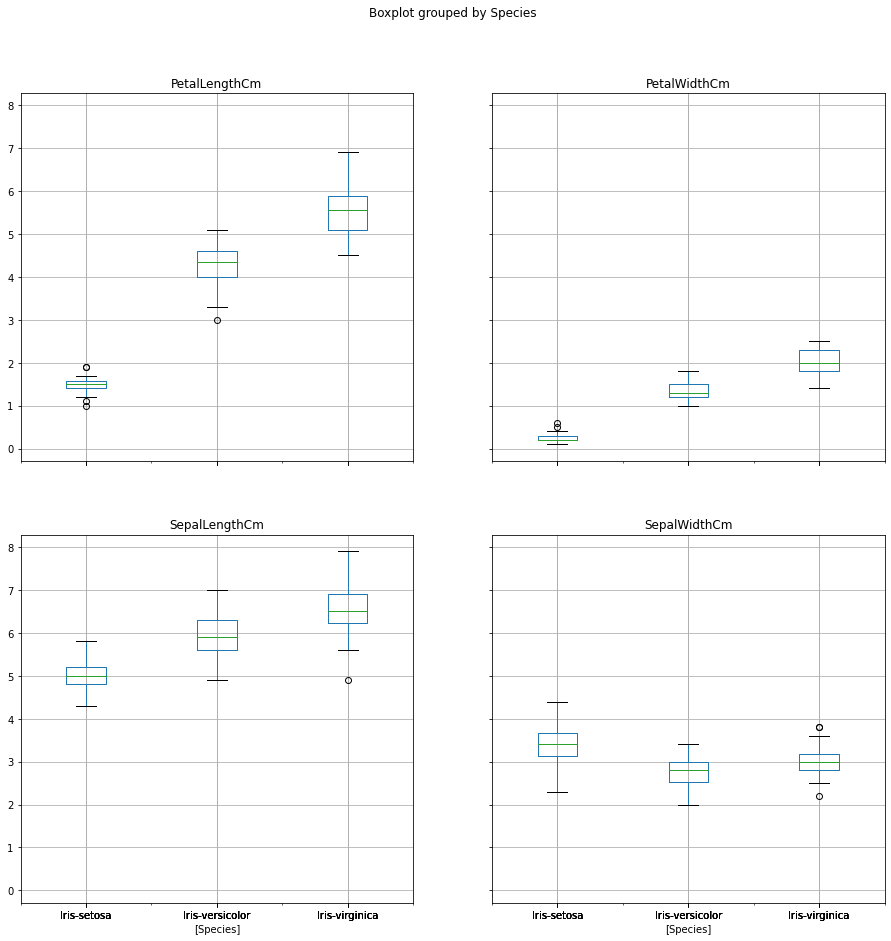

In [ ]:
# We can quickly make a boxplot with Pandas on each feature split out by species
df.boxplot(by="Species", figsize=(15,15))

### Steps To Be followed When Applying an Algorithm
* Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model   better.
* Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
* Then pass the training dataset to the algorithm to train it. We use the .fit() method
* Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
* We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [ ]:
# importing alll the necessary packages to Logistic Regression
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy

### Splitting The Data into Training And Testing Dataset

In [ ]:
X=df.iloc[:,0:4]
Y=df["Species"]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)

Train Shape (112, 4)
Test Shape (38, 4)


## Logistic Regression

In [ ]:
log = LogisticRegression()
log.fit(X_train,Y_train)
prediction=log.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,Y_test))

The accuracy of the Logistic Regression is 0.9736842105263158


# **Bonus Models**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn.svm import SVC   #for Support Vector Machine (SVM) Algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

### Decison Tree

In [ ]:
tree=DecisionTreeClassifier()
tree.fit(X_train,Y_train)
prediction=tree.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,Y_test))

The accuracy of the Decision Tree is 0.9736842105263158


### K Nearest Neighbor Classification

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
knn.fit(X_train,Y_train)
prediction=knn.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,Y_test))

The accuracy of the KNN is 0.9736842105263158


### Support Vector Machine

In [ ]:
svc=SVC()
svc.fit(X_train,Y_train)
prediction=svc.predict(X_test)
print('The accuracy of the SVC is',metrics.accuracy_score(prediction,Y_test))

The accuracy of the SVC is 0.9736842105263158


### Random forest Classfier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
forest.fit(X_train,Y_train)
print('The accuracy of the SVC is',metrics.accuracy_score(prediction,Y_test))

The accuracy of the SVC is 0.9736842105263158


# That is it guys!!!!!
### I will Update it and more content to it

#### Hope this will help you **Upvote it if you Like it**
#### Follow me for more.